# 1.4 Supervised Learning Algorithms DT

## 1. Import libraries and load data
## 2. Data Wrangling
## 3. Run decision tree algorithm
## 4. Create confusion matrix

### 1.Import libraries and load data

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [7]:
#Create a path to where your data is stored.
path = r'C:\Users\User\250216_ClimateWins Analysis\Data Sets'

In [21]:
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path, 'Prepared Data', 'weather_prediction_dataset_scaled.csv'))

In [22]:
climate.head()

,Unnamed: 0,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,-1.731975,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,-1.731824,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,-1.731673,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,-1.731523,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,-1.731372,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [23]:
# Import the pleasant weather data
pwdf = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pwdf

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 2. Data Wrangling

In [25]:
df_wrangled=climate.drop(columns=['GDANSK_cloud_cover',
                                       'GDANSK_humidity',
                                       'GDANSK_precipitation',
                                       'GDANSK_snow_depth',
                                       'GDANSK_temp_mean',
                                       'GDANSK_temp_min',
                                       'GDANSK_temp_max',
                                       'ROMA_cloud_cover',
                                       'ROMA_wind_speed',
                                       'ROMA_humidity',
                                       'ROMA_pressure',
                                       'ROMA_sunshine',
                                       'ROMA_temp_mean',
                                       'TOURS_wind_speed',
                                       'TOURS_humidity',
                                       'TOURS_pressure',
                                       'TOURS_global_radiation',
                                       'TOURS_precipitation',
                                       'TOURS_temp_mean',
                                       'TOURS_temp_min',
                                       'TOURS_temp_max', 'Unnamed: 0'])

In [26]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_wrangled.drop(['DATE', 'MONTH'], axis=1)
y = pwdf.drop(['DATE'], axis=1)

In [27]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
#viewing shape of training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 148)
(5738, 148)
(17212, 15)
(5738, 15)


### 3. Run decision tree algorithm

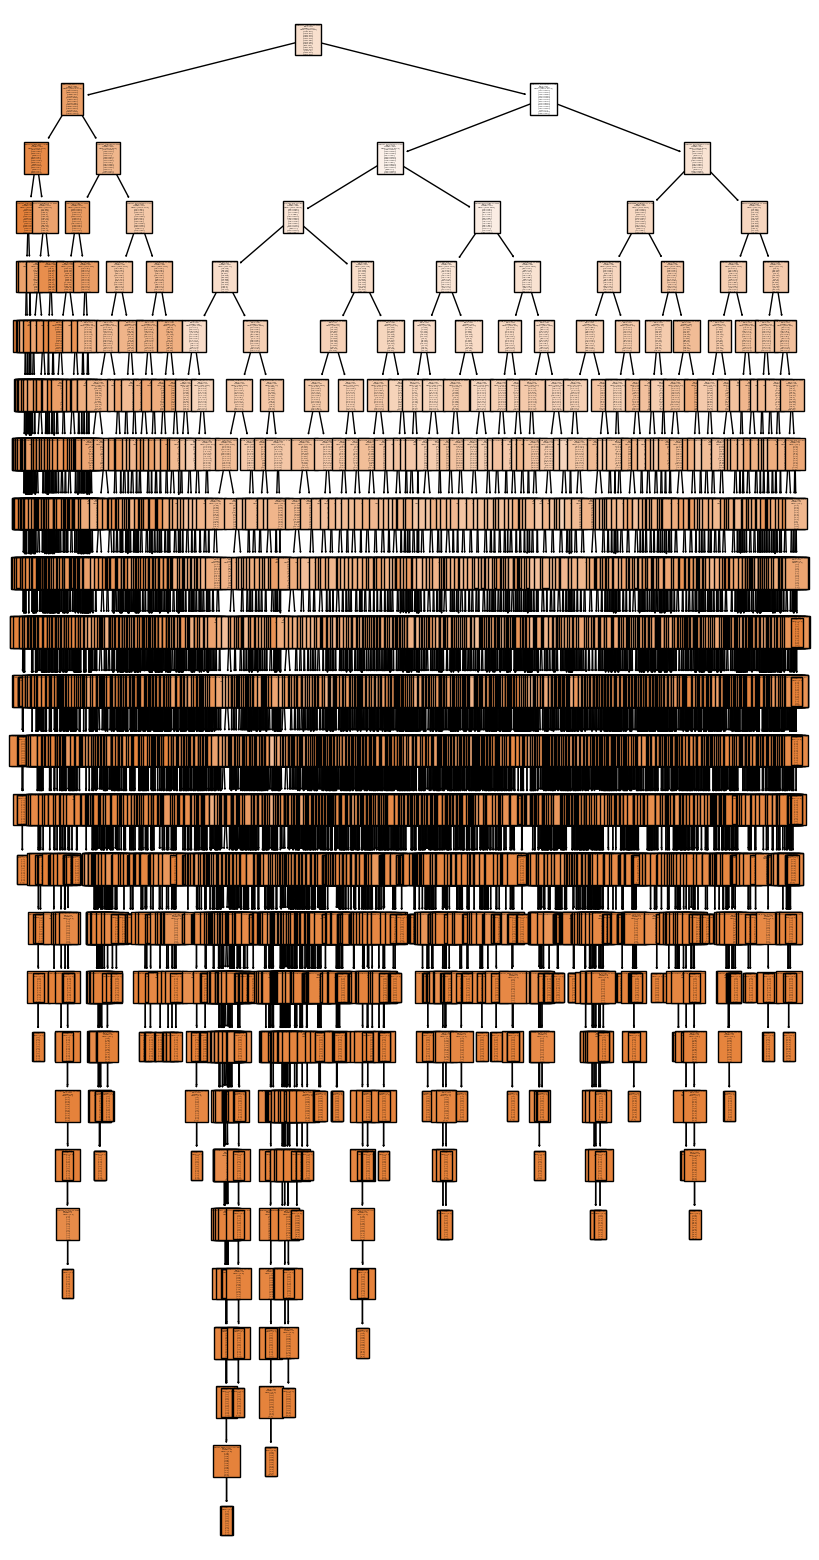

Training accuracy score (cross-validation): 0.6014990392856109
Training Accuracy on Full Data: 1.0
Testing Accuracy: 0.6326246078773091


In [56]:
# Initialize the Decision Tree Classifier
dt_climate = DecisionTreeClassifier(criterion='gini', min_samples_split=2)

# Cross-validation (evaluates the model before fitting)
cv_score = cross_val_score(dt_climate, X_train, y_train, cv=3, scoring='accuracy').mean()

# Fit the model on training data
dt_climate.fit(X_train, y_train)

# Generate predictions on both training and test sets
y_pred_train = dt_climate.predict(X_train)  # Predictions for training data
y_pred_test = dt_climate.predict(X_test)    # Predictions for test data

# Convert predictions to DataFrames with correct column names
y_pred_train_df = pd.DataFrame(y_pred_train, columns=y_train.columns)
y_pred_test_df = pd.DataFrame(y_pred_test, columns=y_test.columns)

# Plot the decision tree
plt.figure(figsize=(10, 20))
tree.plot_tree(dt_climate, filled=True, feature_names=X_train.columns, class_names=["Not Pleasant", "Pleasant"])
plt.show()

# Print cross-validation training accuracy
print('Training accuracy score (cross-validation):', cv_score)

# Print accuracy on training and test sets
train_accuracy = dt_climate.score(X_train, y_train)
test_accuracy = dt_climate.score(X_test, y_test)

print("Training Accuracy on Full Data:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


In [38]:
# check training accuracy on full training data set

train_accuracy = dt_climate.score(X_train, y_train)
print("Training Accuracy on Full Data:", train_accuracy)

Training Accuracy on Full Data: 1.0


In [40]:
# Check Testing Accuracy
test_accuracy = dt_climate.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.6317532241199024


### 4. Create confusion matrix

BASEL: y_train shape = (17212,), y_pred shape = (17212,)
BELGRADE: y_train shape = (17212,), y_pred shape = (17212,)
BUDAPEST: y_train shape = (17212,), y_pred shape = (17212,)
DEBILT: y_train shape = (17212,), y_pred shape = (17212,)
DUSSELDORF: y_train shape = (17212,), y_pred shape = (17212,)
HEATHROW: y_train shape = (17212,), y_pred shape = (17212,)
KASSEL: y_train shape = (17212,), y_pred shape = (17212,)
LJUBLJANA: y_train shape = (17212,), y_pred shape = (17212,)
MAASTRICHT: y_train shape = (17212,), y_pred shape = (17212,)
MADRID: y_train shape = (17212,), y_pred shape = (17212,)
MUNCHENB: y_train shape = (17212,), y_pred shape = (17212,)
OSLO: y_train shape = (17212,), y_pred shape = (17212,)
SONNBLICK: y_train shape = (17212,), y_pred shape = (17212,)
STOCKHOLM: y_train shape = (17212,), y_pred shape = (17212,)
VALENTIA: y_train shape = (17212,), y_pred shape = (17212,)
Training confusion matrix saved at: C:\Users\User\250216_ClimateWins Analysis\Visualisations\confusion_mat

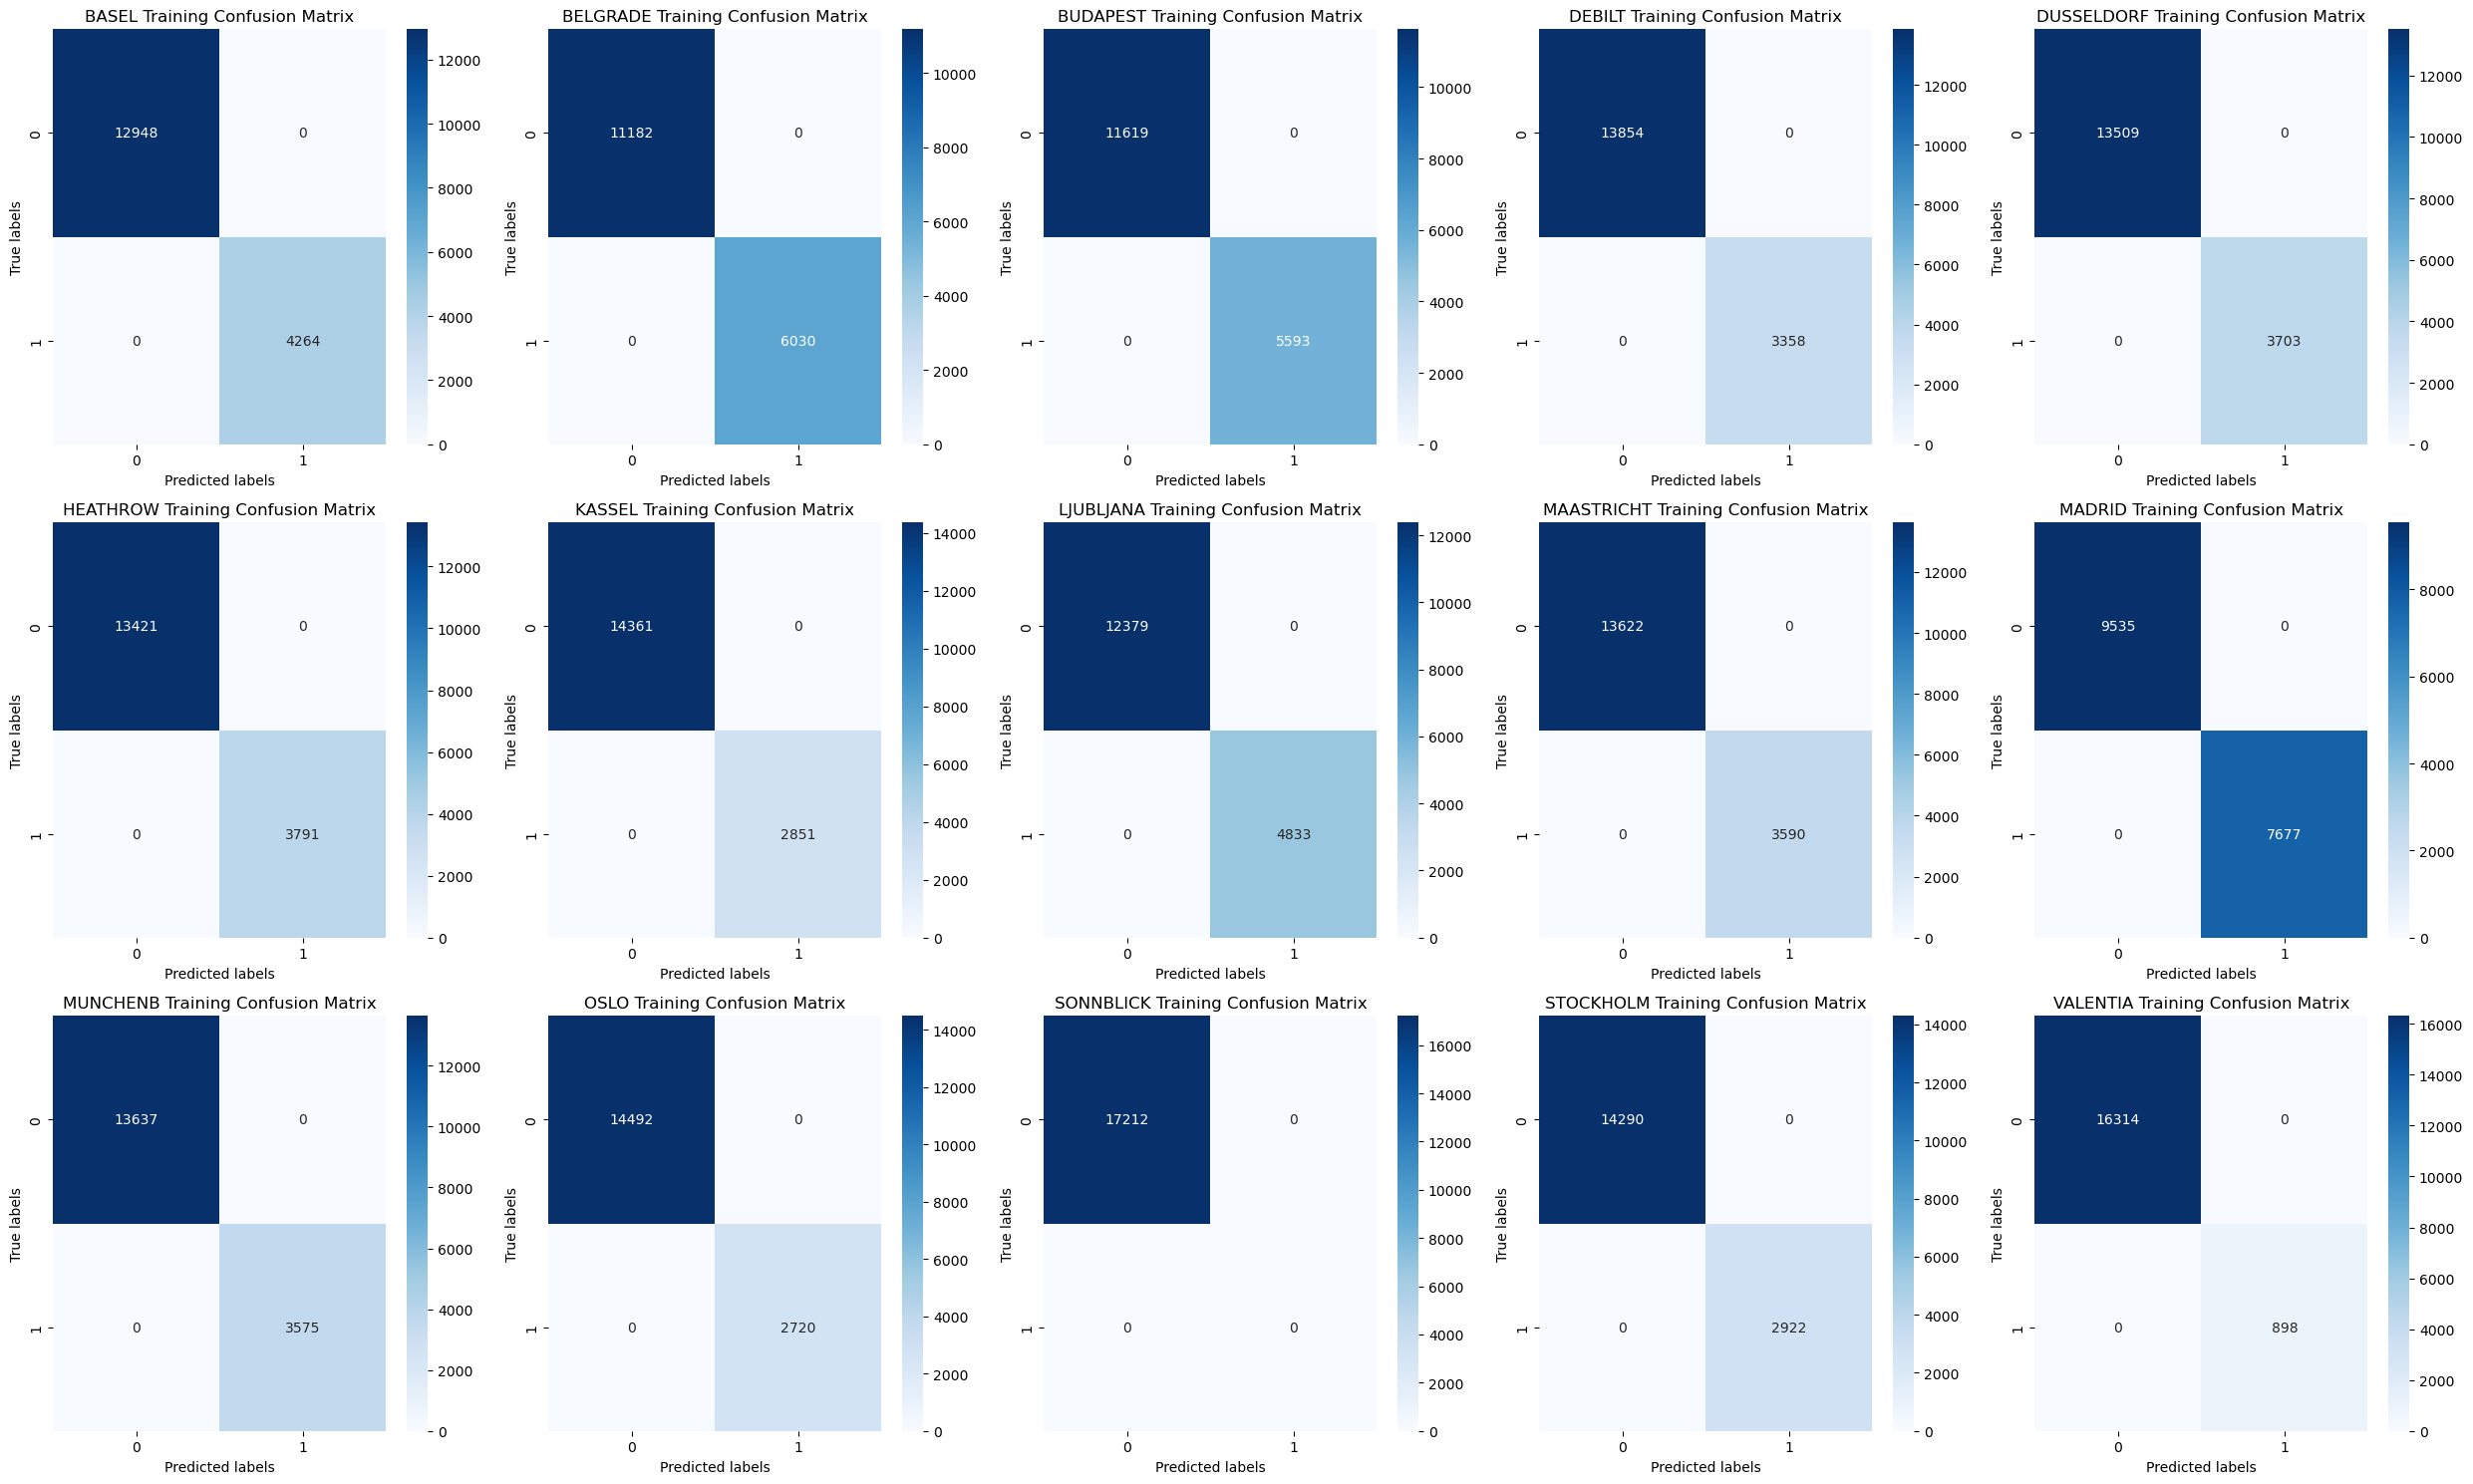

In [58]:
# Ensure predictions use the correct training data
y_pred_train_df = y_pred_train_df.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Extract unique locations
locations = list({x.split("_")[0] for x in df_wrangled.columns if x not in ["MONTH", "DATE"]})
locations.sort()

key = "_pleasant_weather"

# Create subplots
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
count = 0

for i in range(3):
    for j in range(5):
        if count < len(locations):  # Avoid index out of range
            name = locations[count]

            # Debugging step: Check shape consistency
            print(f"{name}: y_train shape = {y_train.loc[:, name + key].shape}, y_pred shape = {y_pred_train_df.loc[:, name + key].shape}")

            # Compute confusion matrix (ensuring both labels 0 and 1 are considered)
            cm = confusion_matrix(y_train.loc[:, name + key], y_pred_train_df.loc[:, name + key], labels=[0, 1])

            # Plot heatmap
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap="Blues")

            # Labels and title
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels') 
            ax[i, j].set_title(name + ' Training Confusion Matrix') 

            count += 1

# Adjust layout
plt.tight_layout()

# Define the correct save path (use r"" for raw string to avoid errors)
save_path = os.path.join(r"C:\Users\User\250216_ClimateWins Analysis", "Visualisations", "confusion_matrix_train.png")

# Ensure the "Visualisations" folder exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the plot
plt.savefig(save_path, dpi=300, bbox_inches='tight')

print(f"Training confusion matrix saved at: {save_path}")
plt.show()


BASEL: y_test shape = (5738,), y_pred shape = (5738,)
BELGRADE: y_test shape = (5738,), y_pred shape = (5738,)
BUDAPEST: y_test shape = (5738,), y_pred shape = (5738,)
DEBILT: y_test shape = (5738,), y_pred shape = (5738,)
DUSSELDORF: y_test shape = (5738,), y_pred shape = (5738,)
HEATHROW: y_test shape = (5738,), y_pred shape = (5738,)
KASSEL: y_test shape = (5738,), y_pred shape = (5738,)
LJUBLJANA: y_test shape = (5738,), y_pred shape = (5738,)
MAASTRICHT: y_test shape = (5738,), y_pred shape = (5738,)
MADRID: y_test shape = (5738,), y_pred shape = (5738,)
MUNCHENB: y_test shape = (5738,), y_pred shape = (5738,)
OSLO: y_test shape = (5738,), y_pred shape = (5738,)
SONNBLICK: y_test shape = (5738,), y_pred shape = (5738,)
STOCKHOLM: y_test shape = (5738,), y_pred shape = (5738,)
VALENTIA: y_test shape = (5738,), y_pred shape = (5738,)
Test confusion matrix saved at: C:\Users\User\250216_ClimateWins Analysis\Visualisations\confusion_matrix_test.png


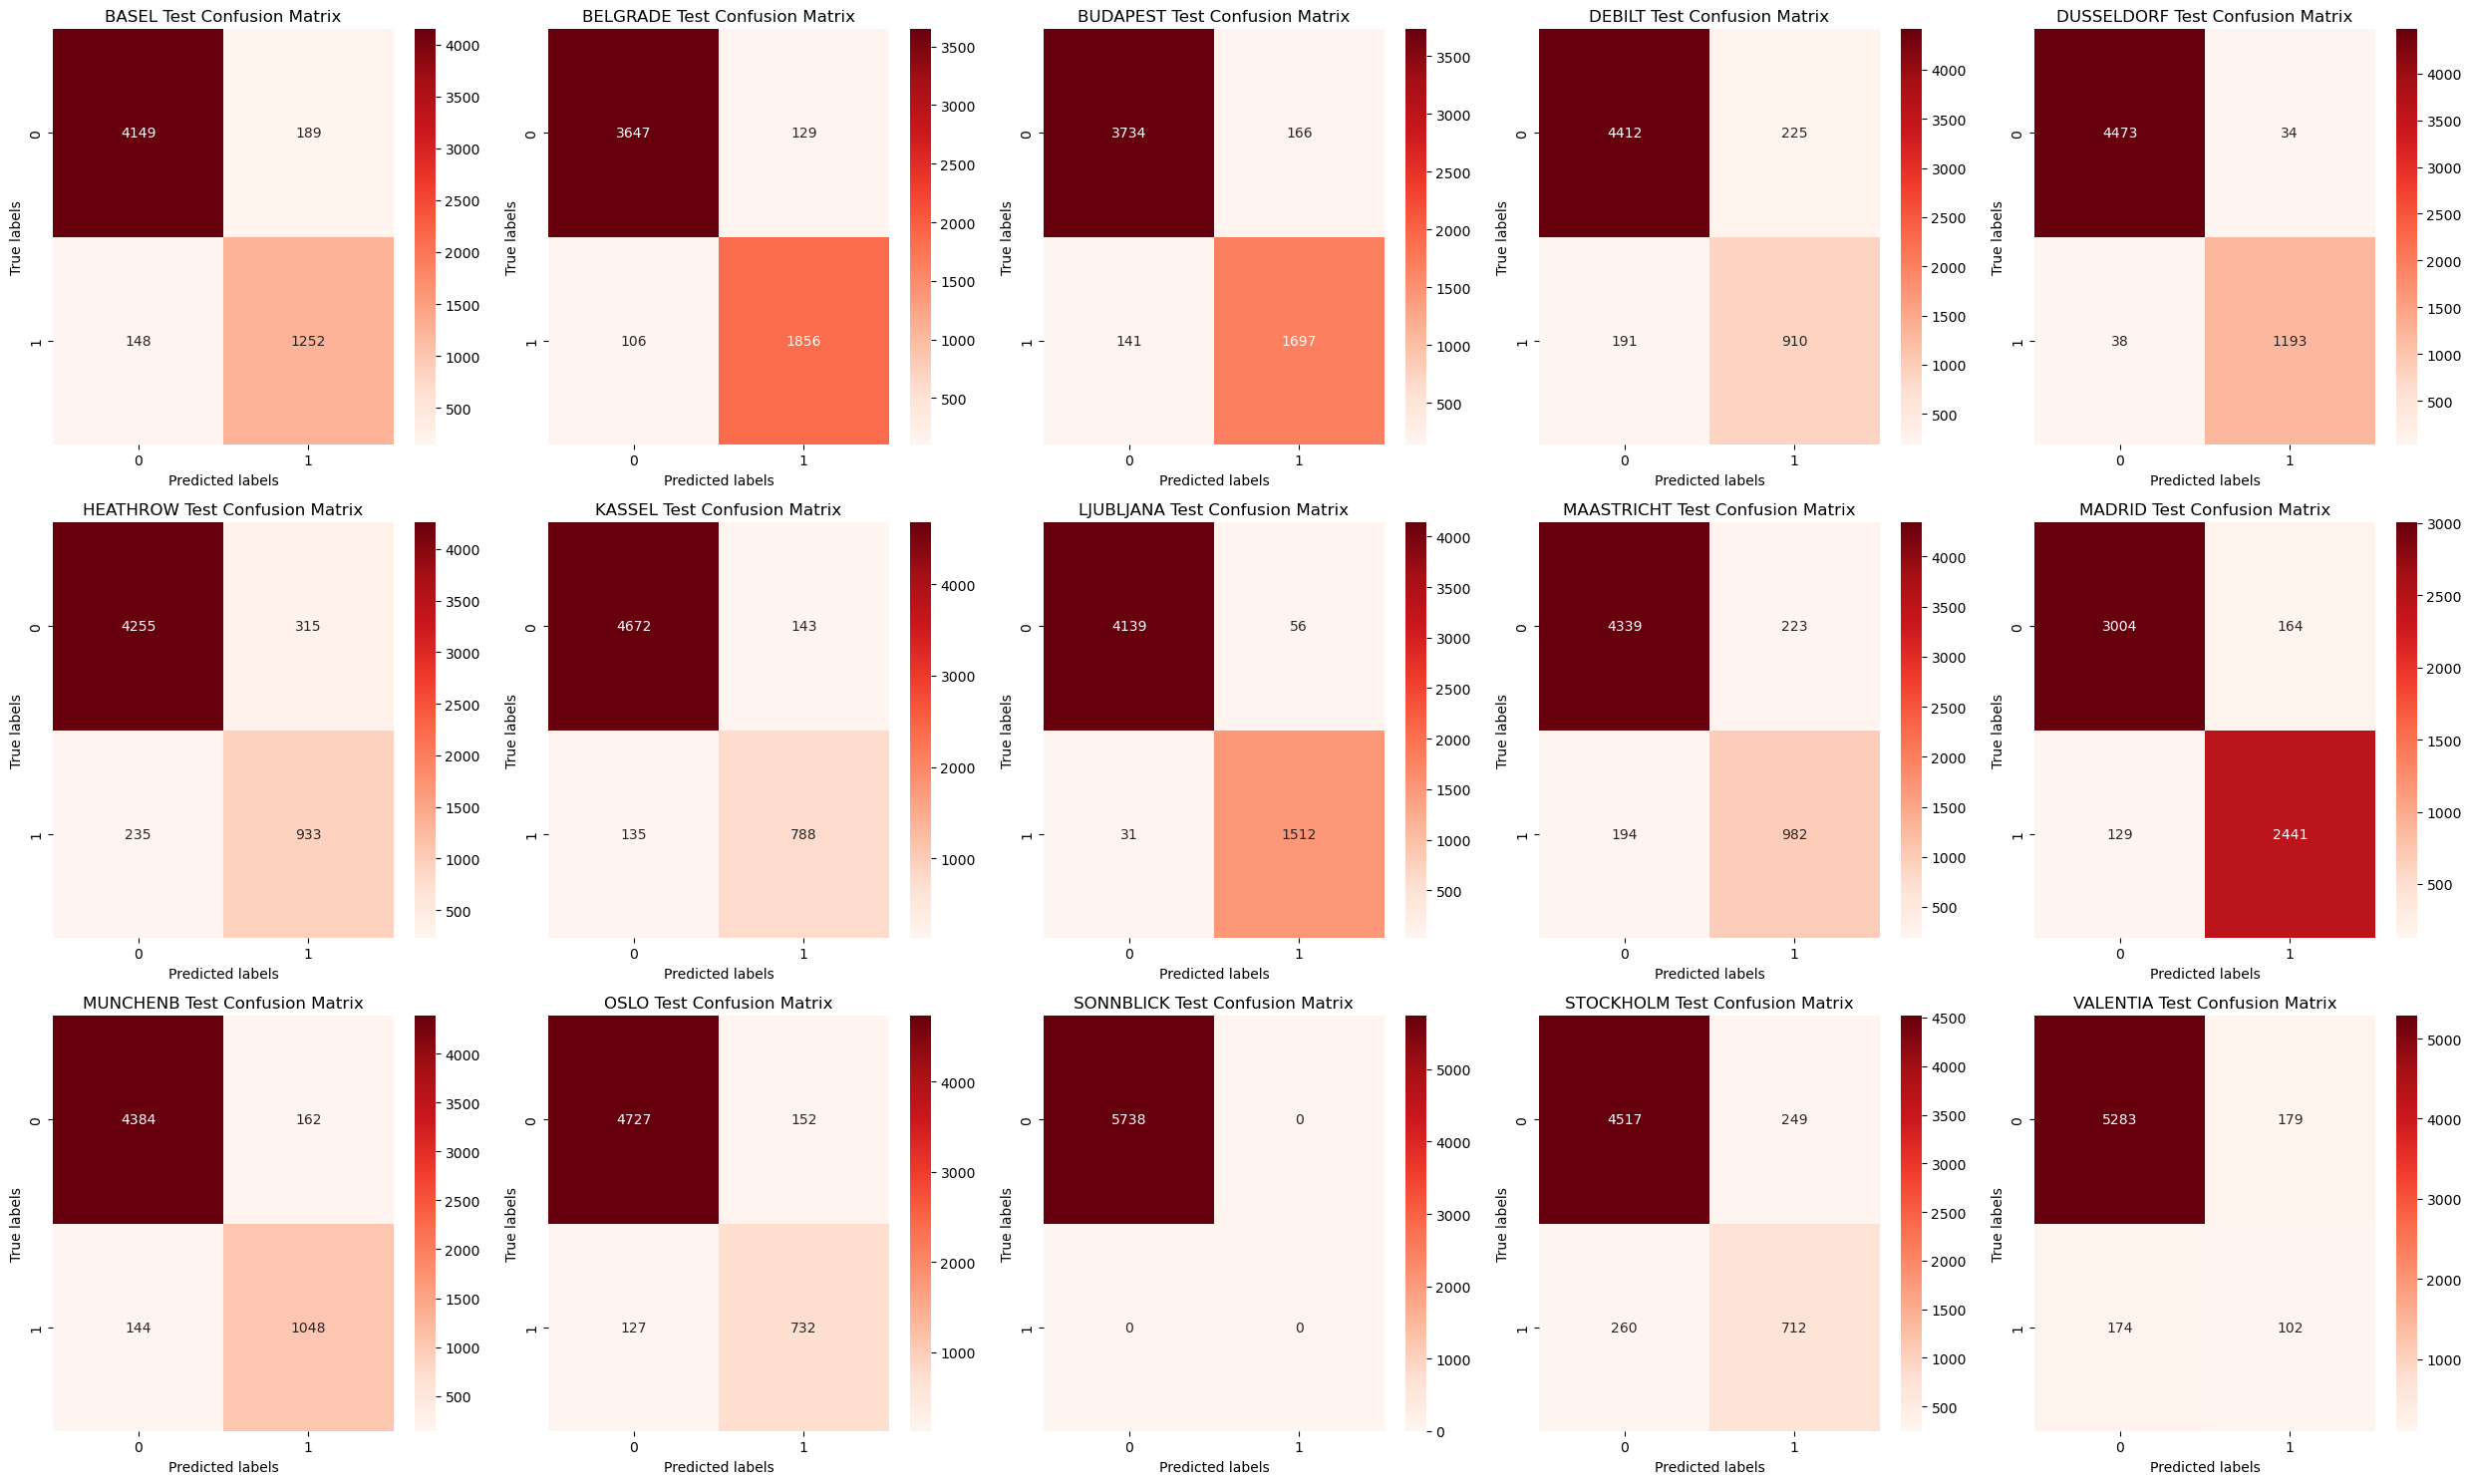

In [60]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ensure predictions use the correct test data
y_pred_test_df = y_pred_test_df.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Extract unique locations
locations = list({x.split("_")[0] for x in df_wrangled.columns if x not in ["MONTH", "DATE"]})
locations.sort()

key = "_pleasant_weather"

# Create subplots
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
count = 0

for i in range(3):
    for j in range(5):
        if count < len(locations):  # Avoid index out of range
            name = locations[count]

            # Debugging step: Check shape consistency
            print(f"{name}: y_test shape = {y_test.loc[:, name + key].shape}, y_pred shape = {y_pred_test_df.loc[:, name + key].shape}")

            # Compute confusion matrix (ensuring both labels 0 and 1 are considered)
            cm = confusion_matrix(y_test.loc[:, name + key], y_pred_test_df.loc[:, name + key], labels=[0, 1])

            # Plot heatmap
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap="Reds")

            # Labels and title
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels') 
            ax[i, j].set_title(name + ' Test Confusion Matrix')

            count += 1

# Adjust layout
plt.tight_layout()

# Define the correct save path (use r"" for raw string to avoid errors)
save_path = os.path.join(r"C:\Users\User\250216_ClimateWins Analysis", "Visualisations", "confusion_matrix_test.png")

# Ensure the "Visualisations" folder exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the plot
plt.savefig(save_path, dpi=300, bbox_inches='tight')

print(f"Test confusion matrix saved at: {save_path}")
plt.show()